In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [393]:
usd_eur = pd.read_csv("../USDEUR=X.csv", parse_dates=['Date'])
usd_gbp = pd.read_csv("../USDGBP=X.csv", parse_dates=['Date'])
usd_chf = pd.read_csv("../USDCHF=X.csv", parse_dates=['Date'])
eur_gbp = pd.read_csv("../EURGBP=X.csv", parse_dates=['Date'])
eur_chf = pd.read_csv("../EURCHF=X.csv", parse_dates=['Date'])
gbp_chf = pd.read_csv("../GBPCHF=X.csv", parse_dates=['Date'])
print(f"USD/EUR: {usd_eur.shape}")
display(usd_eur.head())
print(f"USD/GBP: {usd_gbp.shape}")
display(usd_gbp.head())
print(f"USD/CHF: {usd_chf.shape}")
display(usd_chf.head())
print(f"EUR/GBP: {eur_gbp.shape}")
display(eur_gbp.head())
print(f"EUR/CHF: {eur_chf.shape}")
display(eur_chf.head())
print(f"GBP/CHF: {gbp_chf.shape}")
display(gbp_chf.head())

USD/EUR: (260, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,1.00717,1.00812,0.99950,1.00717,1.00717,0
1,2022-11-08,0.99814,1.00240,0.99067,0.99814,0.99814,0
2,2022-11-09,0.99198,0.99875,0.99120,0.99198,0.99198,0
3,2022-11-10,0.99805,1.00626,0.98203,0.99805,0.99805,0
4,2022-11-11,0.98114,0.98365,0.96727,0.98114,0.98114,0


USD/GBP: (260, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.88200,0.88532,0.87084,0.88249,0.88249,0
1,2022-11-08,0.86855,0.87479,0.86225,0.86821,0.86821,0
2,2022-11-09,0.86589,0.88034,0.86454,0.86560,0.86560,0
3,2022-11-10,0.87958,0.87989,0.85596,0.87965,0.87965,0
4,2022-11-11,0.85476,0.85845,0.84746,0.85502,0.85502,0


USD/CHF: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.99674,0.99759,0.98766,0.99674,0.99674,0
1,2022-11-08,0.98888,0.99250,0.98368,0.98888,0.98888,0
2,2022-11-09,0.98445,0.98731,0.98048,0.98445,0.98445,0
3,2022-11-10,0.98350,0.98973,0.96633,0.98350,0.98350,0
4,2022-11-11,0.96491,0.96806,0.94463,0.96491,0.96491,0


EUR/GBP: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.87614,0.87888,0.87021,0.87614,0.87614,0
1,2022-11-08,0.86979,0.87437,0.86909,0.86979,0.86979,0
2,2022-11-09,0.87253,0.88207,0.87153,0.87253,0.87253,0
3,2022-11-10,0.88130,0.88150,0.87063,0.88130,0.88130,0
4,2022-11-11,0.87131,0.87769,0.87108,0.87131,0.87131,0


EUR/CHF: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.98930,0.99180,0.98640,0.98930,0.98930,0
1,2022-11-08,0.99080,0.99311,0.98809,0.99080,0.99080,0
2,2022-11-09,0.99241,0.99360,0.98610,0.99241,0.99241,0
3,2022-11-10,0.98546,0.98937,0.98200,0.98546,0.98546,0
4,2022-11-11,0.98345,0.98738,0.97430,0.98345,0.98345,0


GBP/CHF: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,1.12934,1.13712,1.12563,1.12934,1.12934,0
1,2022-11-08,1.13888,1.14126,1.13310,1.13888,1.13888,0
2,2022-11-09,1.13713,1.13911,1.11924,1.13713,1.13713,0
3,2022-11-10,1.11779,1.13511,1.11779,1.11779,1.11779,0
4,2022-11-11,1.12853,1.13171,1.11301,1.12853,1.12853,0


In [394]:
def arima(df, n_test, p, d, q):

    train = df.iloc[:df.shape[0] - n_test]
    test = df.iloc[df.shape[0] - n_test:]

    model = pm.arima.ARIMA(order = (p, d, q), maxiter = 200)
    model.fit(train['Close'])

    preds = model.predict(n_periods = n_test)
    pred_df = pd.DataFrame(preds, columns=['Forecast'])
    
    pd.concat([df['Close'], pred_df], axis=1).plot()
    pd.concat([df['Close'][- n_test:], pred_df], axis=1).plot()

    print('MSE: ', np.mean((test['Close'] - preds)**2))
    return pred_df


/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  3.7203714222067598e-06


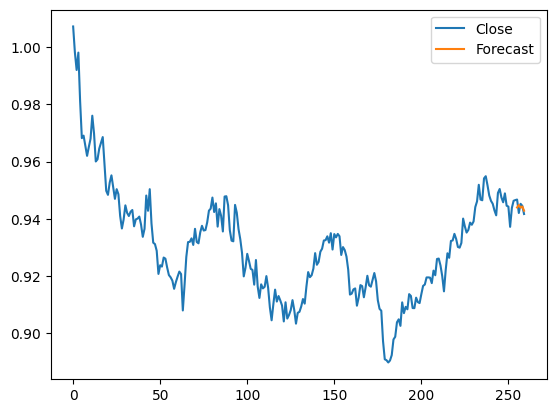

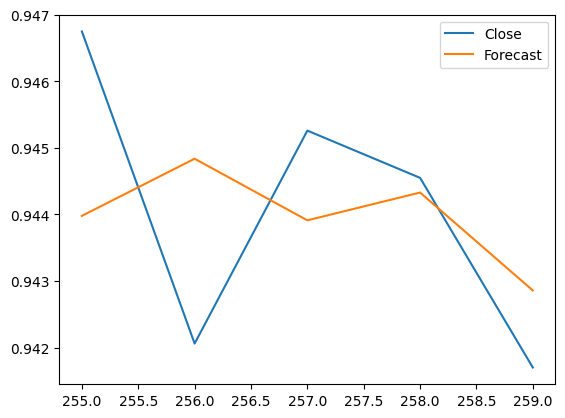

In [395]:
usd_eur_pred = arima(usd_eur, 5, 19, 2, 20)

/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE:  2.1931936475660937e-06


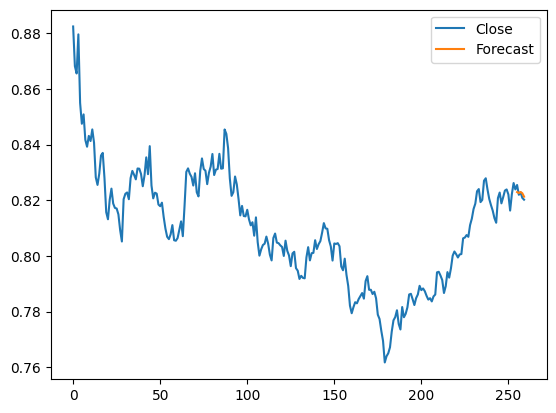

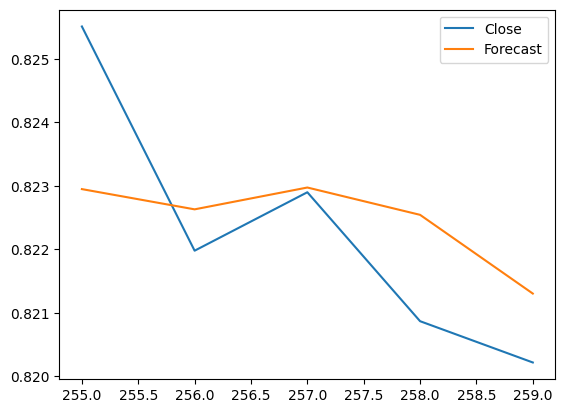

In [396]:
usd_gbp_pred = arima(usd_gbp, 5, 19, 1, 20)

/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  3.2725169532464845e-05


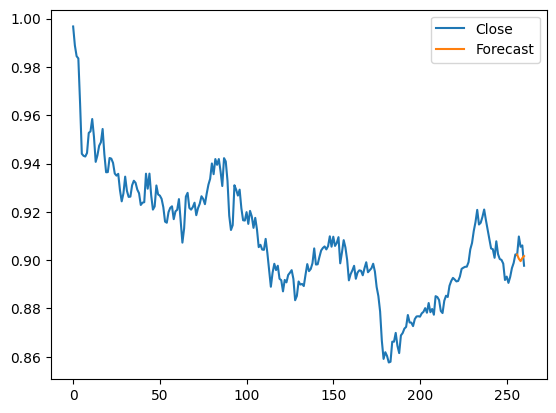

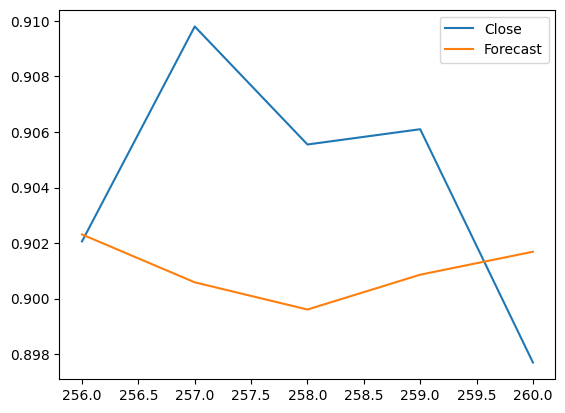

In [397]:
usd_chf_pred = arima(usd_chf, 5, 19, 2, 20)

/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  1.550784597293758e-05


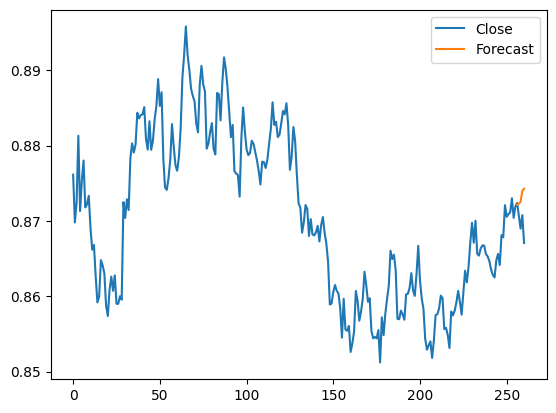

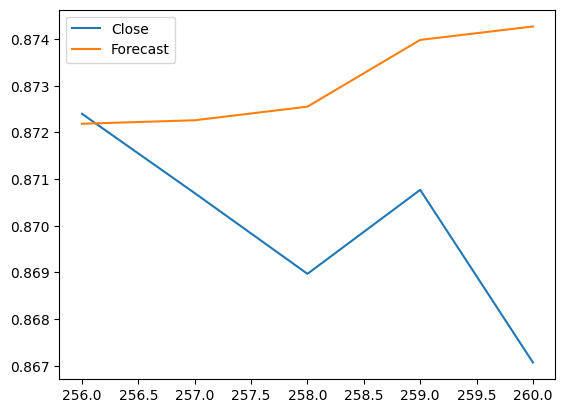

In [398]:
eur_gbp_pred = arima(eur_gbp, 5, 18, 2, 20)

/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  5.578822565386536e-05


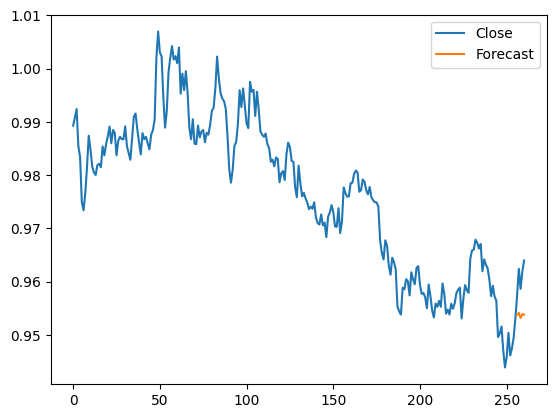

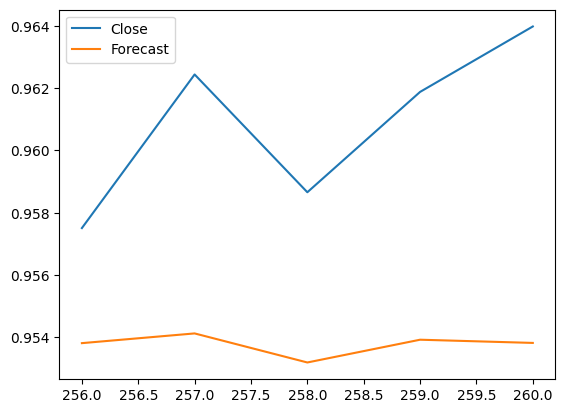

In [399]:
eur_chf_pred = arima(eur_chf, 5, 19, 1, 20)

/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/mlsphw1/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  7.05186843916458e-05


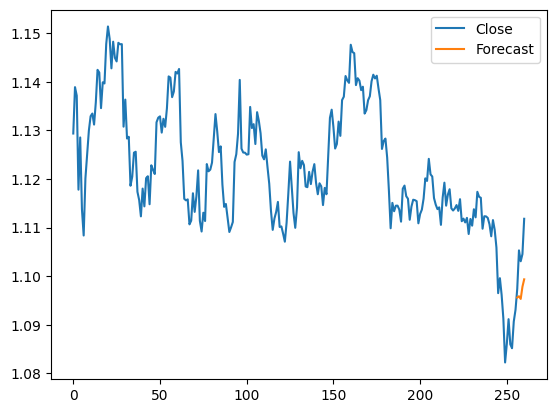

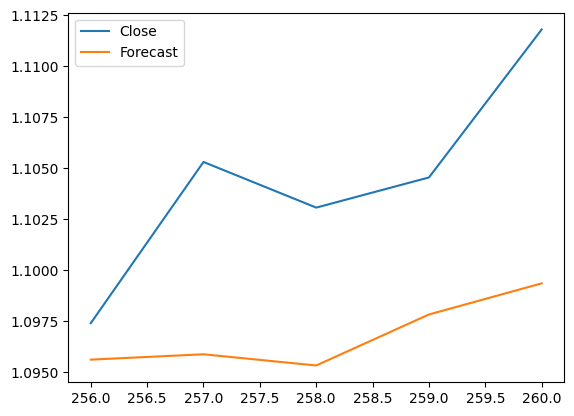

In [400]:
gbp_chf_pred = arima(gbp_chf, 5, 19, 1, 20)

In [401]:
usd_eur_pred.values

array([[0.94397897],
       [0.94483764],
       [0.94391162],
       [0.94432934],
       [0.94285806]])

In [402]:
mat = np.hstack((usd_eur_pred, eur_chf_pred, eur_gbp_pred, gbp_chf_pred, usd_chf_pred, usd_gbp_pred))
mat

array([[0.94397897, 0.95381719, 0.87218701, 1.09560171, 0.90231059,
        0.82294955],
       [0.94483764, 0.9541291 , 0.87226212, 1.09586386, 0.90058626,
        0.82263093],
       [0.94391162, 0.95319662, 0.87255404, 1.09531464, 0.89960699,
        0.82297459],
       [0.94432934, 0.95392719, 0.87398458, 1.09781701, 0.90086102,
        0.82254438],
       [0.94285806, 0.95382433, 0.87427241, 1.09934346, 0.90168796,
        0.82130502]])

In [403]:
np.savetxt('predictions_arima.csv', mat)